# Kapitel 7 - Gradient, Jacobi- und Hesse-Matrix

In [13]:
import sys
sys.path.append("../src/") 
from quiz import start_quiz
from utils import css_styling, hide_code
from functionplotter import plt_function
css_styling()

<div class=note>
    <b>Hinweis</b>: Lineare Algebra
    <br>
    <br>Ab diesem Kapitel werden Grundlagen der <b>Linearen Algebra</b> vorausgesetzt. Es wird empfohlen, die Tutorialreihe dazu bereits abgeschlossen oder zumindest so weit behandelt zu haben, dass folgende Verfahren und Methoden bekannt sind und angewendet werden können:<br>
<ul>
    <li>Vektoren</li>
    <li>Matrizen</li>
    <li>Rechnen mit Vektoren und Matrizen (Addition, Multiplikation, Skalarprodukt, etc.)</li>
    <li>Symmetrie von Matrizen</li>
    <li>Determinante einer Matrix</li>
    <li>Transponieren eines Vektors/einer Matrix</li>
    <li>TODO: Mehr?</li>
</ul>
</div>

## 1. Kapitelübersicht <a class="anchor" id="1"/>

Im letzten Kapitel haben wir Funktionen mit mehreren Variablen behandelt (**multivariate Funktionen**) und gelernt, wie wir diese nach bestimmten Variablen ableiten können (**partielle Ableitungen**). In diesem Kapitel lernen wir den **Gradienten**, die  **Jacobi-Matrix** und die **Hesse-Matrix** kennen, die uns erlauben, partielle Ableitungen erster und zweiter Ordnung in einem **Vektor** oder einer **Matrix** zu speichern. Zudem lernen wir Anwendungsfälle kennen, in welchen uns der Gradient, die Jacobi-Matrix oder die Hesse-Matrix helfen.


<b>Abschnittsübersicht</b><br>

[1. Kapitelübersicht](#1)<br>
[2. Gradien](#2)<br>
[2.1. Berechnung](#2-1)<br>
[2.2. Interpretation](#2-2)<br>
[3. Jacobi-Matrix](#3)<br>
[4. Hesse-Matrix](#4)<br>
[4.1. Berechnung](#4-1)<br>
[4.2. Interpretation](#4-2)<br>

<b>Quizübersicht</b><br>
[Gradienten, Jacobi-Matrix und Hesse-Matrix Quiz](#q1)<br>

<b>Behandelte Themen</b><br>
- Gradient
- Jacobi-Matrix
- Unterschied Gradient und Jacobi-Matrix
- Hesse-Matrix
- Verwendung von 3D-Plots
- Tensoren
- Ermittlung von mehrdimensionalen Extremstellen
- Symmetrie der Hesse-Matrix

## 2. Gradient <a class="anchor" id="2"/>

### 2.1. Berechnung <a class="anchor" id="2-1"/>

Der **Gradient** einer multivariaten Funktion ist ein **Vektor**, dessen Einträge die **partiellen Ableitungen erster Ordnung** der Funktion sind. Der erste Eintrag des Vektors ist die partielle Ableitung erster Ordnung nach der ersten Variable, der zweite Eintrag die partielle Ableitung erster Ordnung nach der zweiten Variable usw.


Schauen wir uns das an einem Beispiel an. Wir haben die folgende Funktion gegeben:<br>

$f(x, y, z) = x^2 + y + 3z$<br>

Im letzten Kapitel hatten wir gelernt, dass wir für jede Variable (hier: $x$, $y$ und $z$) dieser Funktion eine sogenannte **partielle Ableitung** bilden können. Diese wären in diesem Fall:<br>

$\frac{\partial f}{\partial x} = 2x \qquad \frac{\partial f}{\partial y} = 1 \qquad \frac{\partial f}{\partial z} = 3$<br>

In vielen Fällen wäre es praktisch, alle partiellen Ableitungen erster Ordnung einer multivariaten Funktion zu **speichern**. Dies können wir mit dem **Gradienten** machen. Unser "Speichermedium" ist dabei ein **Vektor**. Wir verwenden hier aus Konventionsgründen einen **Zeilenvektor**. Alle partiellen Ableitungen werden nun als ein Eintrag im Vektor repräsentiert bzw. gespeichert:<br>

$\nabla f(x,y,z) = \begin{bmatrix} \dfrac{\partial f}{\partial x}, \dfrac{\partial f}{\partial y}, \dfrac{\partial f}{\partial z}\end{bmatrix}$<br>

Bezogen auf unser Beispiel sieht unser Gradient folgendermaßen aus:<br>

$\nabla f(x,y,z) = \begin{bmatrix} 2x, 1, 3\end{bmatrix}$<br>

<div class="tool">
<span class="invisible_border"><img src="img/icons/tools.svg" class="icon"/><b>Werkzeugkasten: <u>Gradient</u></b></span>
    <br>
    <br>Der <b>Gradient</b> ist ein <b>Vektor</b>, der alle <b>partiellen Ableitungen <u>erster Ordnung</u></b> einer <i>Skalarfunktion</i> enthält. Mathematisch wird der Gradient mit dem <a href="https://de.wikipedia.org/wiki/Nabla">Nabla (∇)</a> Zeichen dargestellt. Eine andere, häufig verwendete Schreibweise ist $\text{grad}(f)$. In dieser Tutorialreihe werden beide Schreibweisen verwendet.<br>
    
<u>Definition</u>:<br>
$\nabla f(a) =  \begin{bmatrix}\dfrac{\partial f}{\partial x_1}, \dotsc, \dfrac{\partial f}{\partial x_n}\end{bmatrix}$
<br><br>
Das $a$ in der Definition steht für alle möglichen Variablen. Die unterschiedlichen $x$ unter dem Bruchstrich der partiellen Ableitungen stehen für jede der verschiedenen $n$ Variablen.
<br>
<br>
<u>Beispiel</u>:<br>
Gegeben: $f(x,y,z) = x^2y + 3xz^3 + yz^4$<br>
    
<b>Gradient</b>: $\nabla f(x,y,z) = \begin{bmatrix}2xy+3z^3, x^2+z^4, 9xz^2+4yz^3\end{bmatrix}$

</div>

### 2.2. Interpretation <a class="anchor" id="2-2"/>

Doch was bedeutet nun dieser Vektor, abseits von seiner Rolle als Speichermedium? Übergeben wir Gradientenvektor eine bestimmte $x$-, $y$- und $z$-Koordinante, erhalten wir einen Vektor, der in die Richtung der **steilsten Steigung** der Funktion zeigt. Wie wir uns das vorstellen können, wird am besten durch **Visualisierungen** verdeutlicht.

Schauen wir uns zuerst eine simple multivariate Funktion an (die Beispielfunktion von oben ohne $z$):<br>

$f(x,y) = x^2 + y$<br>

Der Gradient für diese Funktion ist folgende:<br>

$\nabla f(x,y) = \begin{bmatrix} 2x, 1\end{bmatrix}$<br>

Nun haben wir gesagt, dass wir diesem Vektor $x$- und $y$-Koordinate übergeben müssen, um einen Vektor zu erhalten, der in die Richtung der **steilsten Steigung** der Funktion zeigt. Übergeben wir dem Gradienten ein paar Koordinaten und sehen dann, was wir erhalten:<br>

$\nabla f(0,0) = \begin{bmatrix} 0, 1\end{bmatrix}$<br>
$\nabla f(1,1) = \begin{bmatrix} 2, 1\end{bmatrix}$<br>
$\nabla f(-1,0) = \begin{bmatrix} -2, 1\end{bmatrix}$<br>
$\nabla f(2,2) = \begin{bmatrix} 4, 1\end{bmatrix}$<br>
$\nabla f(10,10) = \begin{bmatrix} 20, 1\end{bmatrix}$<br>
$\nabla f(-5,-5) = \begin{bmatrix} -10, 1\end{bmatrix}$<br>

Wir sehen, dass egal welche $y$-Koordinate wir eingeben, wir immer $1$ erhalten, also einen konstanten Betrag. Nur die $x$-Koordinate ändert sich. Um eine Intuition dafür zu erhalten, in welche Richtung die Vektoren zeigen, schauen wir uns den 3D-Plot in der folgenden Code-Zeile an. 

<div class=digression>
    <b>Exkurs</b>: Lesen von 3D-Plots
    <br>
    <br>Bei <b>3D-Plots</b> gibt es die $x$-Achse, die $y$-Achse und die $z$-Achse. Letztere ist einfach $f(x,y)$, also das Ergebnis, was man erhält, wenn man einen Punkt in die Funktion eingibt.<br>
    
<u>Beispiel</u>:<br>
Gegebene Funktion: $f(x,y) = x^2 + y$<br>
Gegebener Punkt: $P(2,2)$<br>
Koordinanten: $x = 2 \qquad y=2 \qquad z=6$<br>
    
Wenn Sie diesen Punkt im Plot in der folgenden Code-Zelle finden wollen, nutzen Sie am besten die interaktive Visualisierung (siehe Hinweis-Kasten). Nutzen Sie auch die eingezeichneten Gitterlinien als Orientierungshilfe. Fangen Sie am besten mit der $x$-Koordinate an, gehen dann weiter bis zur $y$-Koordinate und dann "hoch" zur entsprechenden $z$-Koordinate. Passen Sie hier auf, dass die Nullstelle der $z$-Achse etwas weiter oben steht, als Sie eventuell vermuten würden (dadurch kann der Plot schöner dargestellt werden).
</div>

<div class=note>
    <b>Hinweis</b>: Interaktiver Plot
    <br>
    <br>Wenn Sie eine 3D Plot im Notebook interaktiv betrachten möchten, nutzen Sie <code>%matplotlib notebook</code> vor dem Plot (entfernen Sie dafür ggbf. in der Code-Zeile über <code>plt_function</code> den Kommentar <code>#</code>). Damit können Sie innerhalb von Jupyter Notebooks interaktive 3D-Plots erhalten. Wie Sie diesen bedienen, wird in diesem <a href="https://medium.com/@Med1um1/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1">Artikel</a> erklärt. Sollte der interaktive Plot hängen oder ihr Notebook sehr langsam werden (die Interaktivität kann sehr ressourcenlastig werden), kommentieren Sie die Zeile mit dem <code>%matplotlib notebook</code> (wieder) aus und starten Sie das Notebook am besten neu. 
</div>

<IPython.core.display.Javascript object>


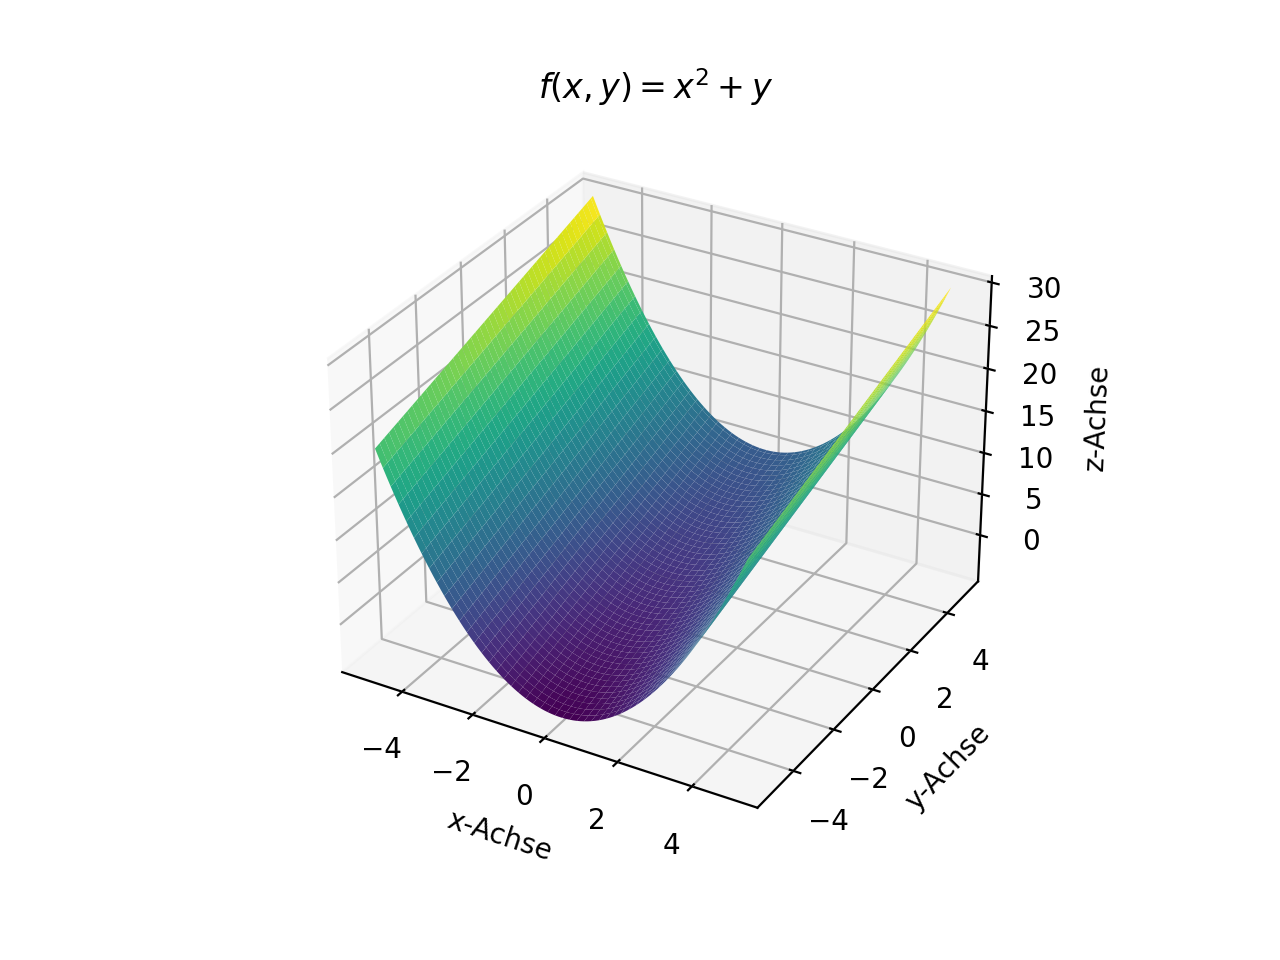

In [14]:
%matplotlib notebook
plt_function(name="multivariate1", space=(-5.0, 5.0), plot_3D_graph=True)

Der Plot ähnelt ein wenig einer Rutsche. Wenn Sie die Interaktivität des Plots aktivieren (in der statischen Ansicht ist dies etwas schwierig zu sehen), können Sie sehen, dass der Plot ein Gefälle hat (dort, wo man beim Rutschen einer Rutsche liegt/sitzt) und rechts und links von diesem Gefälle steigt der Plot steil an (die Wände der Rutsche). Wir gucken uns nun die ersten drei Punkte an, von denen wir oben die Gradienten berechnet haben (die $z$-Koordinate berechnen wir händisch, siehe Exkurs-Kasten):<br>

$P_1(0,0,0)$<br>
$P_2(1,1,2)$<br>
$P_3(-1,0,1)$<br>

Versuchen Sie zunächst, diese Punkte im Plot wiederzufinden. Nun berechnen wir von jedem Punkt den Gradienten:<br>

$\nabla f(0,0) = \begin{bmatrix} 0, 1\end{bmatrix}$<br>
$\nabla f(1,1) = \begin{bmatrix} 2, 1\end{bmatrix}$<br>
$\nabla f(-1,0) = \begin{bmatrix} -2, 1\end{bmatrix}$<br>

Wie bereits erwähnt, erhalten wir nun für jeden Punkt einen Vektor, der in die Richtung der **steilsten Steigung** der Funktion zeigt. Um das nachzuvollziehen, gehen wir jeden Punkt durch.

Lokalisieren wir zunächst $P_1(0,0,0)$. Der Vektor für diesen Punkt ist $\begin{bmatrix} 0, 1\end{bmatrix}$. Wir können also sehen, dass der Vektor in Richtung $1$ der $y$-Achse zeigt. In dieser Richtung steigt der Plot tatsächlich an. Unser Vektor bewegt sich in die Richtung, von der wir, wenn der Plot eine Rutsche darstellen würde, kommen würden, wenn wir auf dieser Rutsche rutschen würden. 

Nehmen wir nun den Punkt $P_2(1,1,2)$. Sobald wir diesen Punkt lokalisiert haben, sehen wir, dass dieser sich an der "Wand" des Plots befindet. Die "Wände" des Plots sind um einiges steiler als das Gefälle in der Mitte. Tatsächlich können wir anhand des Vektors $\begin{bmatrix} 2, 1\end{bmatrix}$ sehen, dass dieser nicht nur mithilfe der $y$-Koordinate in Richtung des steigenden Gefälles zeigt, sondern mit der $x$-Koordinate auch mehr in Richtung der naheliegenden Wand zeigt, d.h. an die Stelle des Graphen, an der dieser steiler wird. Das gleiche sehen wir, wenn wir uns Punkt $P_3(-1,0,1)$ anschauen, nur das hier der Vektor zur anderen Wand zeigt. 

In der folgenden Code-Zelle können wir uns alle diese Erkenntnisse auch visuell darstellen lassen. Die Gradientenvektoren zu den ausgewählten Punkten wurden alle geplottet. <u>Hinweis</u>: Der $z$-Wert der Punkte (der dritte Wert jeder Punkte-Liste in der folgenden Code-Zelle) wurde auf $20$ gesetzt, damit die Vektoren besser sichtbar sind (die tatsächlichen Werte stehen oben). 

In [3]:
%matplotlib notebook

p1 = [0, 0, 20, 0, 1, 0]
p2 = [1, 1, 20, 2, 1, 0]
p3 = [-1, 0, 20, -2, 1, 0]
vectors = [p1, p2, p3]
plt_function(name="multivariate1", space=(-5.0, 5.0), plot_3D_graph=True, vector_points=vectors)

<IPython.core.display.Javascript object>

Wir schauen uns nun eine weitere multivariate Funktion an: 

$f(x,y) = 3(1-x)^{2} \cdot e^{(-x^{2} - (y+1)^{2})} -10(\frac{x}{5}-x^{3}-y^{5})\cdot e^{(-x^{2}-y^{2})}-\frac{1}{3}\cdot e^{-(x+1)^{2}-y^{2}} \qquad$[<sup>1</sup>](#fn1)<br>

Erschrecken Sie sich nicht davor, Sie müssen nichts davon ableiten oder berechnen. Diese Funktion ist nur so kompliziert konstruiert, da wir dadurch einen schönen 3D-Plot erhalten. Dieser wird in der folgenden Code-Zelle geplottet.

<hr style="border: 0.1px solid black;"/>
<span id="fn1" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">1</sup>&nbsp; Die Funktion wurde Woche 2 dieses <a href="https://www.coursera.org/learn/multivariate-calculus-machine-learning">Coursera-Kurses</a> entnommen.</span><br>

In [4]:
%matplotlib notebook
plt_function(name="multivariate2", space=(-5.0, 5.0), plot_3D_graph=True)

<IPython.core.display.Javascript object>

Der Plot sieht ein wenig aus wie ein Gebirge. Ihn zeichnen mehrere Maxima aus, wobei das globale Maximum stark hervorsticht, ebenso wie mehrere Minima, wo auch das globale Minimum stark hervorsticht.[<sup>2</sup>](#fn2) Wenn man den 3D-Plot nicht interaktiv visualisiert (siehe Hinweis-Box), ist es etwas schwierig, die Minima/Maxima zu erkennen. Um 3D-Plots trotzdem gut in einer statischen Ansicht untersuchen zu können, wird oft ein **Konturdiagramm** verwendet, welches die Minima und Maxima mit einer bestimmten Farbe kennzeichnet.[<sup>3</sup>](#fn3) Im GIF in der nächsten Zelle wird verdeutlicht, wie aus einem Konturdiagramm ein 3D-Plot wird und umgekehrt.[<sup>4</sup>](#fn4)

<br>
<hr style="border: 0.1px solid black;"/>
<span id="fn2" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">2</sup>&nbsp; Minima und Maxima wurden in Kapitel 2 dieser Tutorialreihe erklärt.</span><br>
<span id="fn3" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">3</sup>&nbsp; Mehr zu Konturdiagrammen gibt es <a href="https://de.wikipedia.org/wiki/Isolinie">hier</a>.</span><br>
<span id="fn4" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">4</sup>&nbsp; Die Visualisierung wurde Woche 2 dieses <a href="https://www.coursera.org/learn/multivariate-calculus-machine-learning">Coursera-Kurses</a> entnommen.</span><br>

<img src="img/contour_to_3d.gif" align="left" style="width: 462px;">

Betrachten Sie das Konturdiagramm in der folgenden Code-Zeile. Die Maxima sind durch die hellgrünen/gelben Stellen gekennzeichnet (je gelber, desto größer ist das Maximum), die Minima durch violette Stellen (je dunkler, desto größer ist das Minimum). Wenn Sie die Interaktivität der Code-Zelle anstellen, können Sie mit Ihrer Maus über verschiedene Stellen des Konturdiagramms fahren. Sie sehen dann in der rechten unteren Ecke die $x$ und $y$ Werte der entsprechenden Stelle.

<div class=task>
    <b>Aufgabe</b>: Maxima und Minima im Konturdiagramm herausfinden
    <br>
    <br>Hovern Sie mit ihrer Maus über das interaktive Konturdiagramm und nennen Sie die Werte für das <b>globale Maximum</b> und das <b>globale Minimum</b>.
<br><br>

<label for="show1" class="show_answer">
    <span>Antwort zeigen</span>
</label>
<input type=radio id="show1" class="show" name="group"/>
<input type=radio id="hide1" class="hide" name="group"/>
<span class="content">
    <span>
        <b>Globales Maximum</b>: $\qquad x \approx -0.02 \qquad y \approx 1.6$<br>
        <b>Globales Minimum</b>: $\qquad x \approx 9.2 \qquad y \approx -1.67$
    </span>
    <br><br>
    <label for="hide1" class="hide_answer">
        <span>Antwort verbergen</span> 
    </label> 
</span>
</div>

In [5]:
%matplotlib notebook
plt_function(name="multivariate2", space=(-5.0, 5.0), plot_3D_graph=False, contour_plot=True)

<IPython.core.display.Javascript object>

Wie auch für die Funktion davor können wir bei dieser Funktion die Gradienten berechnen, um Vektoren zu erhalten, welche in die Richtung der **steilsten Steigung** der Funktion zeigen. In der folgenden Abbildung wurde für eine Reihe von Punkten die Gradienten erstellt und die Vektoren in den Graphen eingezeichnet. Alle Vektoren, die in der Nähe des *globalen Minimums* sind, zeigen von diesem weg. Alle Vektoren, die in der Nähe des *globalen Maximums* sind, zeigen auf dieses. Das Gleiche gilt, in einer etwas abgeschwächteren Form, für die *lokalen Minima/Maxima*. 
<br>
<img src="img/contour_vectors.png" align="left" style="width: 430px;" alt="Die Visualisierung wurde Woche 2 dieses Coursera-Kurses entnommen: https://www.coursera.org/learn/multivariate-calculus-machine-learning ."/>

Um das visuelle Verständnis des Gradienten abzuschließen, werden wir nun von einer Funktion den Gradienten berechnen, dann nach und nach Punkte einsetzen und mithilfe der resultierenden Vektoren ermitteln, wie diese Funktion wohl aussieht, d.h. wo die Minima/Maxima sind: 

Wir betrachten dafür die folgende Funktion:<br>

$f(x,y) = e^{-(x^2+y^2)}$

Wir bilden nun davon den Gradienten:<br>

$\nabla f(x,y) = \begin{bmatrix} -2xe^{-(x^2+y^2)}, -2ye^{-(x^2+y^2)}\end{bmatrix}$<br>

Nun setzen wir nach und nach Punkte in den Gradienten ein und erhalten damit Vektoren, die in die Richtung der **steilsten Steigung** des Graphen zeigen, d.h. zu einem Maximum der Funktion:

<span style="color: darkred;">$\nabla f(-1,1) = \begin{bmatrix} 0.27, 0.27\end{bmatrix}$</span><br>
<span style="color: lime;">$\nabla f(2,2) = \begin{bmatrix} -0.001, -0.001\end{bmatrix}$</span><br>
<span style="color: orange;">$\nabla f(0,0) = \begin{bmatrix} 0, 0\end{bmatrix}$</span><br>

Die Punkte werden in Abbildung 1 eingezeichnet. Der Gradientenvektor zum Punkt $P_1(-1,1)$ (dunkelrot) zeigt direkt auf den Ursprung. Auch der Gradientenvektor zum Punkt $P_2(2,2)$ (grün) zeigt auf den Ursprung, jedoch ist dieser Vektor viel kleiner als der Vektor zu $P_1$. Der Gradientenvektor zum Ursprung $P_3(0,0)$ ist ein Nullvektor, er zeigt nirgendwo hin. Die Funktion an diesem Punkt ist flach. Dies bedeutet, dass dieser Punkt entweder ein **Minimum**, ein **Maximum** oder ein **Sattelpunkt**[<sup>5</sup>](#fn5) ist. Plotten wir nun jedoch eine Reihe weiterer Gradientenvektoren (Abbildung 2), können wir sehen, dass der Ursprung ein **Maximum** sein muss, da alle Gradientenvektoren, die ja in Richtung der steilsten Steigung zeigen, zu diesem Punkt zeigen. In Abbildung 3 wurde ein Konturdiagramm erstellt, welches zu einem 3D-Plot transformiert wird. Spätestens hier sollte deutlich werden, wie die Funktion im 3D-Raum aussieht. Schauen wir uns das Konturdiagramm in der folgenden Code-Zelle an, sehen wir auch, dass dieses globale Maximum auch das einzige Maximum unserer Funktion ist.

<br>
<hr style="border: 0.1px solid black;"/>
<span id="fn5" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">5</sup>&nbsp; Sattelpunkte werden in diesem <a href="https://www.mathe-lexikon.at/analysis/differentialrechnung/kurvendiskussion/extremstellen.html">Artikel</a> erklärt.</span><br>

<div class="imgrow">
    <div class="imgcolumn3">
       <figure>
          <img src="img/reverse_maximum_gradient.png" align="left" style="width: 300px;" alt="Die Visualisierung wurde Woche 2 dieses Coursera-Kurses entnommen: https://www.coursera.org/learn/multivariate-calculus-machine-learning ."/>
           <figcaption>Abbildung 1: Die eingezeichneten Punkte</figcaption>
        </figure> 
    </div>
    <div class="imgcolumn3">
       <figure>
          <img src="img/reverse_maximum_gradient2.png" align="left" style="width: 301px;" alt="Die Visualisierung wurde Woche 2 dieses Coursera-Kurses entnommen: https://www.coursera.org/learn/multivariate-calculus-machine-learning ."/>
           <figcaption>Abbildung 2: Alle Gradientenvektoren</figcaption>
        </figure> 
    </div>
    <div class="imgcolumn3">
       <figure>
           <img src="img/reverse_maximum_gradient3.gif" align="left" style="width: 300px;">
           <figcaption>Abbildung 3: Konturdiagramm zu 3D-Plot</figcaption>
        </figure> 
    </div>
</div>

In [6]:
#%matplotlib notebook
plt_function(name="multivariate3", space=(-5.0, 5.0), plot_3D_graph=False, contour_plot=True)

<IPython.core.display.Javascript object>

Doch wieso ist es so wichtig für uns herauszufinden, in welcher Richtung, bezogen von einem Punkt, sich die steilste Steigung einer Funktion befindet? Dieses Wissen ist zentral für das letzte Thema in dieser Tutorialreihe, dem **Gradient Descent** (deutsch: **Gradientenabstieg**). Dieses Verfahren wird eingesetzt, um allgemeine Optimierungsprobleme zu lösen, oft um das **globale Minimum** einer Funktion zu finden. In dem Fall ist es wichtig, den **steilsten Abstieg** von einem bestimmten Punkt eines Graphen zu ermitteln. Dieser wird ermittelt, indem der **negative Gradient** ($\text{Gradient} \cdot -1 = -\text{grad}(f)$) dieses Punktes berechnet wird, da man in die entgegengesetzte Richtung geht. In der Praxis ist das Gradient Descent Verfahren sehr verbreitet im Bereich des **Machine Learning**. Die populärste Anwendung, die Gradient Descent Verfahren verwendet, sind **(tiefe) neuronale Netze**. Diese sind seit einigen Jahren das zentrale Thema der **KI-Forschung** und haben in vielen wissenschaftlichen Bereichen Anwendung gefunden.

## 3. Jacobi-Matrix <a class="anchor" id="3"/>

In diesem Abschnitt behandeln wir die **Jacobi-Matrix**. Andere populäre Begriffe für sie sind **Ableitungsmatrix**, **Funktionalmatrix** oder die englische Bezeichnung **Jacobian**. Am besten wird das, was diese Matrix ausdrücken sollt, aber mit dem Begriff der *Ableitungsmatrix* beschrieben. Eine Jacobi-Matrix ist nämlich eine **Matrix**, die sämtliche **partiellen Ableitungen erster Ordnung** einer multivariaten Funktion enthält. Anwendung findet die Jacobi-Matrix im Zuge einer annäherenden Berechnung (**Approximation**, siehe Kapitel 9 TODO) oder der Minimierung mehrdimensionaler Funktionen.

Sie fragen sich jetzt sicherlich: Macht das, was die Jacobi-Matrix tun soll, nicht schon der **Gradient**? Tatsächlich sind sich der Gradient und die Jacobi-Matrix sehr ähnlich. Der große Unterschied ist, dass ein Gradient nur ein **Vektor** ist, während eine Jacobi-Matrix, wie der Name schon vermuten lässt, eine **Matrix** ist. Der Gradient wird verwendet, wenn unsere multivariate Funktion, die wir ableiten wollen, eine **Skalarfunktion** ist. Die Jacobi-Matrix wird verwendet, wenn unsere multivariate Funktion, die wir ableiten wollen, eine **Vektorfunktion** ist. Von der grundlegenden Berechnung unterscheiden sich die Jacobi-Matrix und der Gradient jedoch nicht wirklich, die Berechnung der Jacobi-Matrix dauert nur etwas länger, da es mehr Berechnungsschritte gibt. 

<div class=digression>
    <b>Exkurs</b>: Skalarfunktionen und Vektorfunktionen
    <br>
    <br>Bis zum jetztigen Zeitpunkt waren alle Funktionen, die wir in dieser Tutorialreihe behandelt haben, <b>Skalarfunktionen</b>. Das sind Funktionen, die als Variablen <b>Skalare</b> übergeben bekommen. Innerhalb eines Vektorraums sind Skalare meistens <a href="https://de.wikipedia.org/wiki/Reelle_Zahl">reele Zahlen</a>. <b>Vektorfunktionen</b> sind uns in dieser Tutorialreihe noch nicht begegnet. Anders als die Skalarfunktionen bekommen diese Funktionen <b>Vektoren</b> als Variablen übergeben.<br>
    
<u>Beispiele für Vektorfunktionen</u>:<br>
    
$f(x) = \begin{pmatrix}2x\\ x^3\end{pmatrix}$<br><br>
$f(x, y, z) = \begin{pmatrix}4x + y\\ y^2 + xz^2 \\ x^3yz^7\end{pmatrix}$<br>
</div>

Solange das Konzept der **Vektorfunktion** verstanden wurde, sind die Berechnungen Jacobi-Matrizen eigentlich relativ unkompliziert. Dies wird an einem Beispiel verdeutlicht:<br>

$f(x, y, z) = \begin{pmatrix}4x + y\\ y^2 + xz^2 \\ x^3yz^7\end{pmatrix}$<br>

Diese Vektorfunktion besteht aus 3 Zeilen, also aus drei *Skalarfunktionen*. Wir müssen nun für jede dieser Zeilen alle partiellen Ableitungen erster Ordnung berechnen. Da wir drei Variablen ($x$, $y$ und $z$) haben, müssen wir für jede Zeile drei partielle Ableitungen berechnen. Insgesamt sind das also neun Berechnungen. Alle partiellen Ableitungen einer Zeile/Skalarfunktion erhalten auch eine eigene Zeile in der Jacobi-Matrix. Alternativ kann die Berechnung einer Jacobi-Matrix auch so hergeleitet werden, dass für jede Zeile der Vektorfunktion der *Gradient* gebildet wird und dann alle *Gradienten* in einer Matrix gespeichert werden. Wir berechnen nun erst einmal die partiellen Ableitungen bzw. den Gradienten der ersten Zeile $4x + y$. Wir erhalten:<br>

$\frac{\partial f_1}{\partial x} = 4 \qquad \frac{\partial f_1}{\partial y} = 1 \qquad \frac{\partial f_1}{\partial z} = 0$<br>

Das schreiben wir nun in unsere Jacobi-Matrix:<br>

$J_f(x,y,z)= \begin{pmatrix}4 & 1 & 0\\ \cdots & \cdots & \cdots\\ \cdots & \cdots & \cdots \end{pmatrix}$<br>

Nun berechnen wir noch die Gradienten bzw. partiellen Ableitungen für die anderen beiden Zeilen:<br>

$\frac{\partial f_2}{\partial x} = z^2 \qquad \frac{\partial f_2}{\partial y} = 2y \qquad \frac{\partial f_2}{\partial z} = 2xz$<br>

$\frac{\partial f_3}{\partial x} = 3x^2yz^7 \qquad \frac{\partial f_3}{\partial y} = x^3z^7 \qquad \frac{\partial f_3}{\partial z} = 7x^3yz^6$<br>


Auch das schreiben wir in unsere Jacobi-Matrix:<br>

$J_f(x,y,z)= \begin{pmatrix}4 & 1 & 0\\ z^2 & 2y & 2xz\\ 3x^2yz^7 & x^3z^7 & 7x^3yz^6 \end{pmatrix}$<br>

Das war es auch schon.

<div class="tool">
<span class="invisible_border"><img src="img/icons/tools.svg" class="icon"/><b>Werkzeugkasten: <u>Jacobi-Matrix</u></b></span>
    <br>
    <br>Die <b>Jacobi-Matrix</b> ist ein Vektor oder eine Matrix, die alle <b>partiellen Ableitungen erster Ordnung</b> einer <b>Vektorfunktion</b> enthält.
    <br>
    <br>

<u>Definition</u>:<br>
Für $J$ kann auch $J_f(a)$ als Notation verwendet werden, wobei $a$ für alle verwendeten Variablen steht. Diese Notation wird in dieser Tutorialreihe häufiger genutzt.<br>

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e343f872b676a0e64646f27593d03c77c53cbaf3" align="center">
    
<u>Beispiel</u>:<br>

Gegeben: $f(x, y, z) = \begin{pmatrix}xyz\\ 3x + z^2 \\ y^5z^2\end{pmatrix}$<br>
Jacobi-Matrix: $J_f(x,y,z) =  \begin{pmatrix}yz & xz & xy\\ 3 & 0 & 2z \\ 0 & 5y^4z^2 & 2y^5z\end{pmatrix}$
</div>

## 4. Hesse-Matrix <a class="anchor" id="4"/>

### 4.1. Berechnung <a class="anchor" id="4-1"/>

In diesem Abschnitt behandeln wir die **Hesse-Matrix** (englisch: **Hessian Matrix**). Eine Hesse-Matrix ist eine **Matrix**, die sämtliche **partiellen Ableitungen zweiter Ordnung** einer multivariaten Funktion enthält. Sie ähnelt der *Jacobi-Matrix*, nur dass anstatt der partiellen Ableitungen erster Ordnung nun die partiellen Ableitungen <u>zweiter Ordnung</u> gespeichert werden. Wir benötigen die Hesse-Matrix vor allem bei der **Approximation** einer mehrdimensionalen Funktion in der Taylorreihe. Dies wird uns in Kapitel 9 begegnen. 

Die Berechnung der Hesse-Matrix ist nicht wirklich komplizierter als die der Jacobi-Matrix. Da wir die partiellen Ableitungen zweiter Ordnung suchen, macht es oft Sinn, vor der Berechnung der Hesse-Matrix die Jacobi-Matrix zu ermitteln. Wir schauen uns das an einem Beispiel an:<br>

$f(x,y,z) = xyz^2$<br>

Die Funktion ist eine Skalarfunktion, d.h. wir müssten hier eigentlich den Gradient berechnen. Wir sehen den Gradienten hier einfach als Jacobi-Matrix mit nur einer Zeile an.<br>

$J_f(x,y,z) = \begin{pmatrix} yz^2 & xz^2 & 2xyz \end{pmatrix}$<br>

Jetzt bilden wir die Hesse-Matrix, indem wir die ermittelte Jacobi-Matrix ableiten. Dabei gehen wir jeden Eintrag unserer Jacobi-Matrix durch und bilden von jedem Eintrag die partiellen Ableitungen. Wir erhalten also eine Hesse-Matrix mit 9 Einträgen ($3x3$), da wir für jede der 3 Einträge unserer Jacobi-Matrix ($yz^2$, $xz^2$ und $2xyz$) jeweils drei partielle Ableitungen bilden müssen ($x$, $y$ und $z$).

Die partiellen Ableitungen des ersten Eintrags $yz^2$ sind:

$\frac{\partial^2 f_1}{\partial x} = 0 \qquad \frac{\partial^2 f_1}{\partial y} = z^2 \qquad \frac{\partial^2 f_1}{\partial z} = 2yz$<br>

Diese fügen wir in unsere Hesse-Matrix ein:<br>

$H_f(x,y,z) = \begin{pmatrix} 0 & z^2 & 2yz \\ \cdots &  \cdots &  \cdots \\  \cdots &  \cdots &  \cdots \end{pmatrix}$<br>

Das gleiche Vorgehen wenden wir auch auf die nächsten beiden Einträge an und erhalten die folgende Hesse-Matrix:


$H_f(x,y,z) = \begin{pmatrix} 0 & z^2 & 2yz \\ z^2 & 0 & 2xz \\ 2yz & 2xz & 2xy \end{pmatrix}$<br>

Eine neue Schwierigkeit hinsichtlich der Komplexität der Berechnung gibt es nicht wirklich. Hier ist es nur wichtig, dass man wirklich konzentriert die Berechnung ausführt, um Flüchtigkeitsfehler zu vermeiden.

Schauen Sie sich jetzt einmal die Hesse-Matrix an, vor allem die Zeilen und Spalten. Können Sie etwas auffälliges entdecken? Tatsächlich ist die Hesse-Matrix **symmetrisch**. Für die Berechnung könnte man theoretisch einfach nur die Diagonale und alles rechts von der Diagonalen der Matrix berechnen und die restlichen Einträge aufgrund der Symmetrie erhalten. Dieser Trick funktioniert immer dann, wenn die Funktion eine **stetige Funktion** ist, d.h. dass die Funktion, dargestellt als Graph, keine Sprünge macht und man den Graphen theoretisch zeichnen könnte, ohne den Stift absetzen zu müssen.





Die ursprüngliche Funktion des oben genannten Beispiels ist eine Skalarfunktion. Doch wie funktioniert die Berechnung, wenn die ursprüngliche Funktion eine **Vektorfunktion** ist? Dies wird an folgendem Beispiel erläutert:<br>

$f(x,y) = \begin{pmatrix}x + y\\ xy^2\end{pmatrix}$<br>

$J_f(x,y) = \begin{pmatrix} 1 & 1 \\ y^2 & 2xy \end{pmatrix}$<br>

Der Vektor $f(x,y)$ wird zu einer Matrix $J_f(x,y)$. Doch nun stehen wir vor einem Problem: Wie sieht die Berechnung der Hesse-Matrix und die resultierende Matrix aus? Leider überspringen viele Calculus-Kurse diesen sehr wichtigen Teil. Die Lösung ist eine **Reihe von Matrizen**, die in einem Vektor gespeichert werden. Für jede Reihe der Jacobi-Matrix wird also zunächst eine Hesse-Matrix gebildet:<br>

$H_1{f(x,y)} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix} \qquad H_2{f(x,y)} = \begin{pmatrix} 0 & 2y \\ 2y & 2x \end{pmatrix}$<br>


Diese werden dann in einem Vektor gespeichert:<br>


$H_f(x,y) = \begin{bmatrix} H_1{f(x,y)} & H_2{f(x,y)}\end{bmatrix}$<br>

Ausgeschrieben wäre das:<br>

$H_f(x,y) = \begin{bmatrix} \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix} & \begin{pmatrix} 0 & 2y \\ 2y & 2x \end{pmatrix}\end{bmatrix}$<br>


Diese Datenform wird auch **Tensor** genannt. In diesem Fall ist die Hesse-Matrix ein **3-D-Tensor**. 

<div class=digression>
    <b>Exkurs</b>: Tensoren
    <br>
    <br><b>Tensoren</b> sind im Wesentlichen <i>Container</i> für Daten, in diesem Fall für numerische Daten. Tensoren sind vor allem für den Programmierteil von Neuronalen Netzen wichtig, in denen Daten und Berechnungen, z.B. Hesse-Matrizen, als Tensoren gespeichert werden. Die Art eines Tensors wird durch seine <i>Dimension</i> bestimmt:<br>
<ul>
    <li><b>0-D-Tensor</b> Ein Tensor, der nur eine Zahl enthält, ist im Grunde ein <b>Skalar</b> Allgemeiner kann er jedoch auch <b>0-D-Tensor</b> genannt werden.</li>
    <li><b>1-D-Tensor</b> Ein <b>1-D-Tensor</b> ist im Grunde ein <b>Vektor</b>.</li>
    <li><b>2-D-Tensor</b> Ein <b>2-D-Tensor</b> ist im Grunde eine <b>Matrix</b>.</li>
    <li><b>3-D-Tensor</b> Ein <b>3-D-Tensor</b> ist ein Array von <b>2-D-Tensoren</b> d.h. von <b>Matrizen</b>.</li>
    <li><b>4-D-Tensor</b> und höher: Ein <b>4-D-Tensor</b> ist ein Array von Arrays von <b>2-D-Tensoren</b>. Ein <b>5-D-Tensor</b> ist dann ein Array von Arrays von Arrays von <b>2-D-Tensoren</b> usw. Im Bereich des <b>Deep Learning</b> kann es schon einmal vorkommen, dass man  <b>5-D-Tensoren</b> oder höherdimensionale Tensoren verarbeiten muss.</li>
</ul>
    
In dieser Tutorialreihe werden wir jedoch größtenteils nicht mit 3-D-Tensoren und höherdimensionalen Tensoren arbeiten, d.h. wir bleiben meist bei Berechnungen von Skalaren, Vektoren und Matrizen. Die meisten Konzepte, die wir in dieser Tutorialreihe lernen, sind auch auf höherdimensionale Tensoren anwendbar, die Berechnung dauert jedoch unglaublich lange und gibt inhaltlich kaum neue Einblicke. Computer sind für solche Berechnungen auf jeden Fall besser geeignet und werden in solchen Fällen auch immer verwendet, händische Berechnungen zu üben lohnt sich deshalb nicht.
</div>

<div class="tool">
<span class="invisible_border"><img src="img/icons/tools.svg" class="icon"/><b>Werkzeugkasten: <u>Hesse-Matrix</u></b></span>
    <br>
    <br>Die <b>Hesse-Matrix</b> ist eine Matrix, die alle <b>partiellen Ableitungen zweiter Ordnung</b> einer <b>Skalar-</b> oder <b>Vektorfunktion</b> enthält. Es ist sinnvoll, zuerst die Jacobi-Matrix einer Funktion zu bilden und auf dieser Grundlage die Hesse-Matrix zu erstellen.
<br>
<br>

<u>Definition</u>:<br>
Für $H_f$ kann auch $H_f(a)$ als Notation verwendet werden, wobei $a$ für alle verwendeten Variablen steht. Diese Notation wird in dieser Tutorialreihe häufiger genutzt.<br>

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/962c31dd86a88d0e45ec8c73fd12e2e8f610ec08" align="center">
    
<u>Beispiel</u>:<br>
    
Gegeben: $f(x, y) = x^3y + x + 2y$<br>
    
Jacobi-Matrix: $J_f(x,y) =  \begin{pmatrix}3x^2y + 1 & x^3 + 2\end{pmatrix}$<br>
    
Hesse-Matrix: $H_f(x,y) =  \begin{pmatrix}6xy & 3x^2 \\ 3x^2 & 0\end{pmatrix}$<br>

### 4.2. Interpretation <a class="anchor" id="4-2"/>

Wie auch beim Gradienten und der Jacobi-Matrix wollen wir uns nun angucken, was die Hesse-Matrix inhaltlich eigentlich bedeutet. Dazu schauen wir uns die folgende Funktion an und bilden sowohl die Jacobi-Matrix (eigentlich ein Gradient) und die Hesse-Matrix:<br>

$f(x,y) = x^2 + y^2$<br>
<br>
$J_f(x,y) = \begin{pmatrix} 2x & 2y \end{pmatrix}$<br>

$H_f(x,y) = \begin{pmatrix} 2 & 0 \\ 0 & 2 \end{pmatrix}$<br>
<br>

Sie können die Funktion in der nächsten Code-Zelle plotten.

<IPython.core.display.Javascript object>


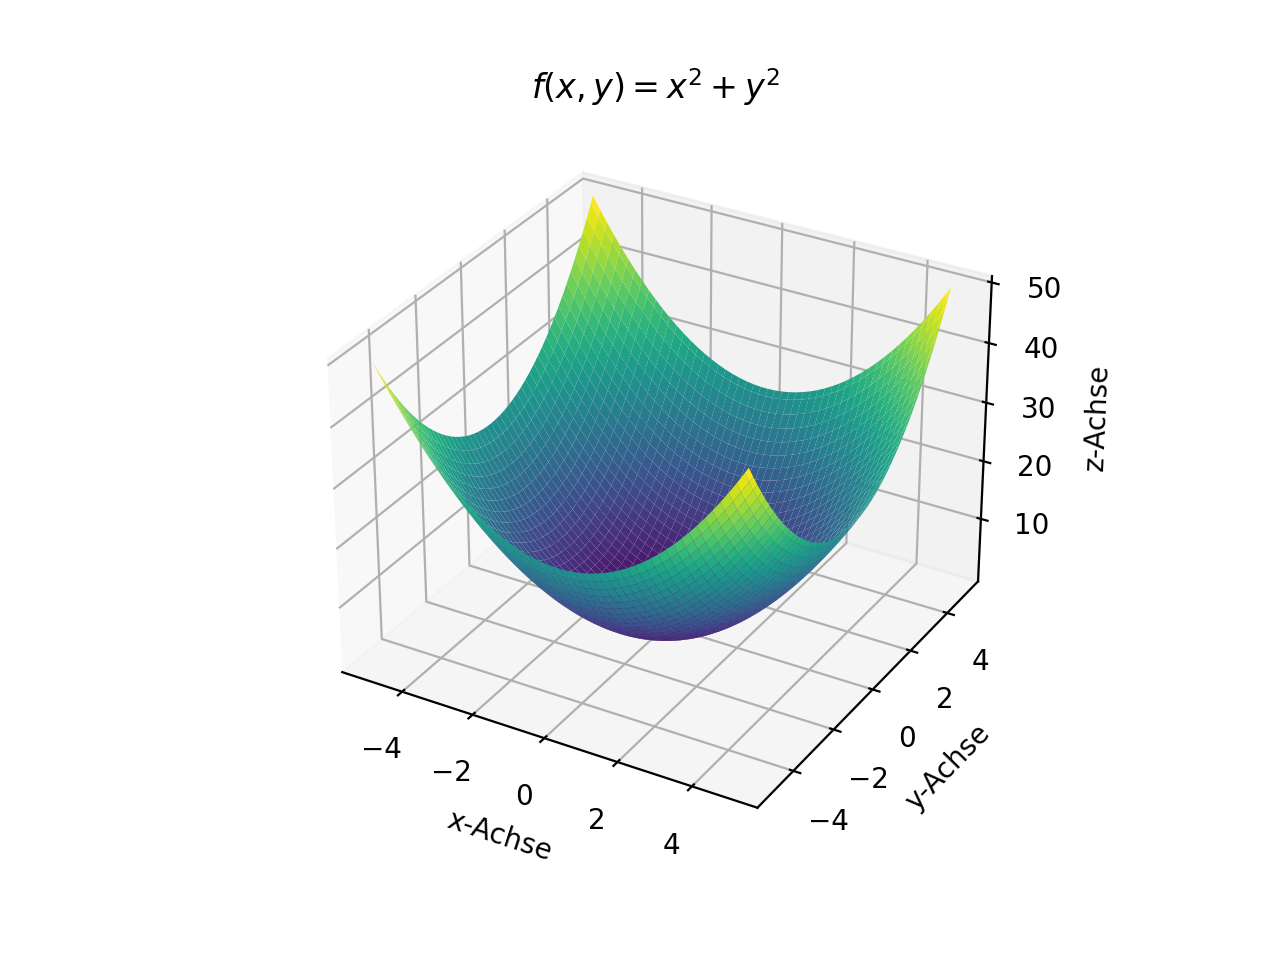

In [12]:
%matplotlib notebook
plt_function(name="multivariate4", space=(-5.0, 5.0), plot_3D_graph=True)

Das globale Minimum dieser Funktion ist im Punkt $P(0,0)$. Dies können wir entweder am Plot erkennen oder wir geben diesen Punkt in unsere Jacobi-Matrix ein, wobei wir den Vektor $\begin{pmatrix} 0 & 0 \end{pmatrix}$ erhalten. Tatsächlich würden wir beim letzten Ansatz nicht wissen, ob wir es mit einem Minimum, Maximum oder Sattelpunkt zu tun haben. Dafür müssten wir weitere Punkte in unsere Jacobi-Matrix einsetzen:<br>

$J_f(1,1) = \begin{pmatrix} 2 & 2 \end{pmatrix}$<br>
$J_f(-1,-1) = \begin{pmatrix} -2 & -2 \end{pmatrix}$<br>
$J_f(1,-1) = \begin{pmatrix} 2 & -2 \end{pmatrix}$<br>
$J_f(-1,1) = \begin{pmatrix} -2 & 2 \end{pmatrix}$<br>

Da die Vektoren jedoch vom Punkt $P(0,0)$ wegzeigen, scheint es sich hier um ein Minimum zu handeln. Dies wird auch in der nächsten Code-Zelle dargestellt (der $z$-Wert der Punkte wurde hier wieder für die bessere Sichtbarkeit erhöht).

<IPython.core.display.Javascript object>


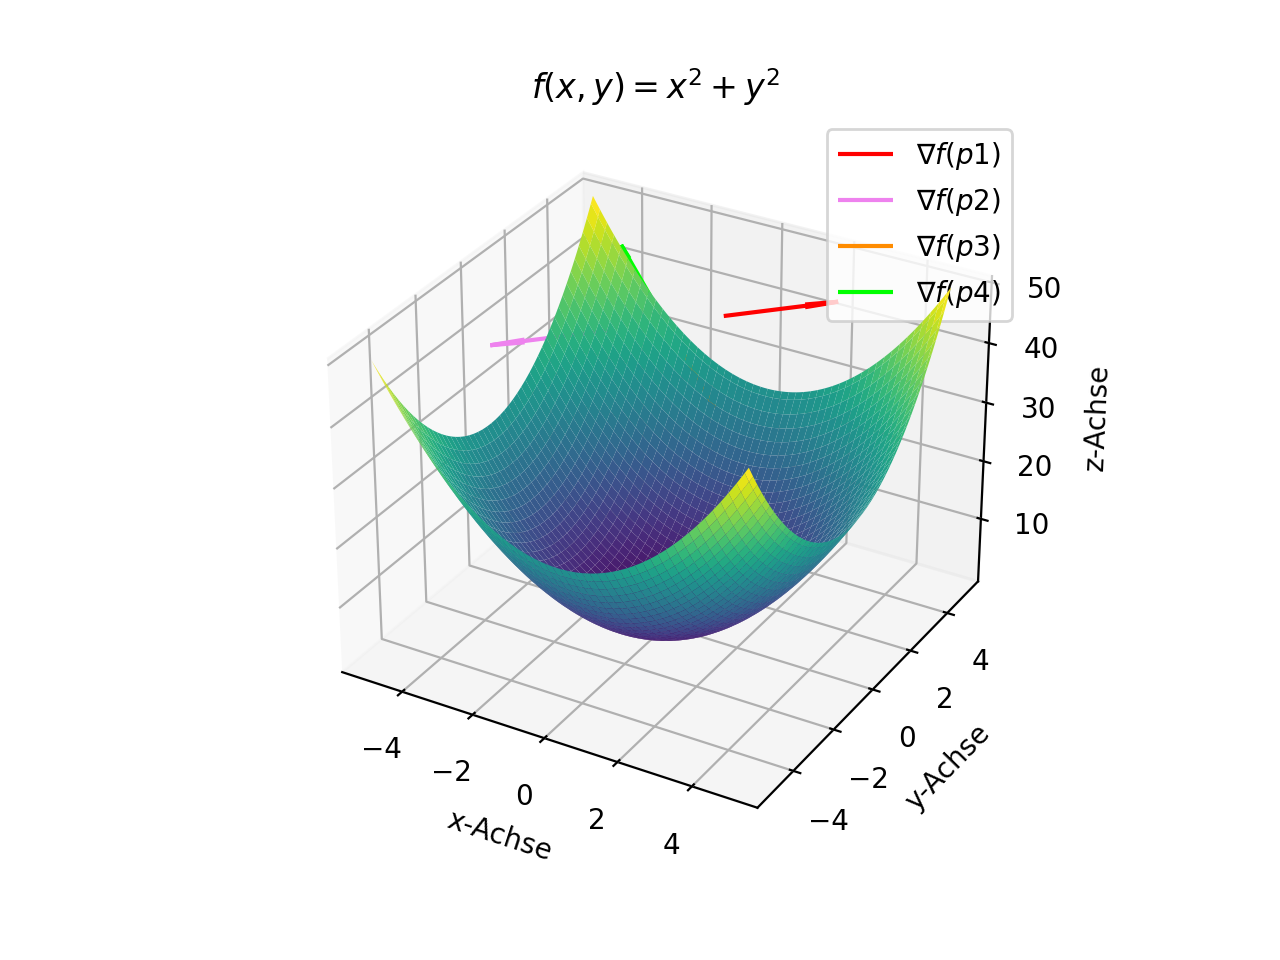

In [11]:
%matplotlib notebook

p1 = [1, 1, 50, 2, 2, 0]
p2 = [-1, -1, 50, -2, -2, 0]
p3 = [1, -1, 50, 2, -2, 0]
p4 = [-1, 1, 50, -2, 2, 0]
vectors = [p1, p2, p3, p4]
plt_function(name="multivariate4", space=(-5.0, 5.0), plot_3D_graph=True, vector_points=vectors)

Nun hängen die beiden vorgestellten Ansätze stark von einer Visualisierung des Graphen ab. In vielen Fällen ist es jedoch nicht möglich, einen hilfreichen Plot einer Funktion zu erstellen oder aber der Plot ist zu ungenau. Es gibt deshalb noch eine weitere Methode, um herauszufinden, ob der Punkt ein Minimum, Maximum oder Sattelpunkt (d.h. eine kritische Stelle bzw. **Extremstelle**) ist. Dafür benötigen wir die **Hesse-Matrix**. Man geht dabei in vier Schritten vor:
1. Gradienten/Jacobi-Matrix der Funktion bilden.
2. Jede Zeile des Gradienten/der Jacobi-Matrix wird auf Null gesetzt. Damit erhält man ein **Gleichungssystem**. Die Lösungen dieses Gleichungssystems sind die kritischen Stellen. Wie man Gleichungssyteme löst, kann in diesem <a href="https://www.mathebibel.de/lineare-gleichungssysteme">Artikel</a> nachgeschaut werden.
3. **Hesse-Matrix** bilden.
4. Stellen aus (2) in die Hesse-Matrix einsetzen und die Determinante bilden. Zusammen mit der Hesse-Matrix sagt diese aus, um welche Extremstelle es sich bei den kritischen Stellen handelt:
    * Wenn die Determinante **positiv** ist <u>UND</u> die Zahl links oben in der Hesse Matrix ebenfalls **positiv** ist, dann ist die Stelle ein **Minimum**.
    * Wenn die Determinante **positiv** ist <u>UND</u> die Zahl links oben in Hessian Matrix **negativ** ist, dann ist die Stelle ein **Maximum**.
    * Wenn die Determinante **negativ** ist, dann ist die Stelle ein **Sattelpunkt**.

#### Beispiel 1

Rechnen wir das nun mit unserem Beispiel durch:<br>

1. $J_f(x,y) = \begin{pmatrix} 2x & 2y \end{pmatrix}$ (bereits oben berechnet)
2. Das Gleichungssystem lösen:<br>

$\qquad \text{I} \qquad 2x = 0$<br>
$\qquad \text{II} \qquad 2y = 0$<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Wir erhalten nur einen Punkt: $P(0,0)$, da in beiden Fällen $2 \cdot 0 = 0$.

3. Auch die Hesse-Matrix hatten wir bereits ermittelt:<br>

$\qquad H_f(x,y) = \begin{pmatrix} 2 & 0 \\ 0 & 2 \end{pmatrix}$

4. Da die Hesse-Matrix weder ein $x$ noch ein $y$ enthält, können und müssen wir nichts einsetzen. Wir bilden nun die **Determinante** der Matrix:

$\qquad |H_f(x,y)| = 2 \cdot 2 - 0 \cdot 0 = 4$<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Da die Determinante **positiv** ist und die Zahl links oben in der Hesse-Matrix ebenfalls **positiv** ist, ist unsere kritische Stelle $P(0,0)$ ein **Minimum** (siehe Liste in Punkt 4).

#### Beispiel 2

Schauen wir uns noch ein Beispiel an:<br>

$f(x,y) = x^2 - y^2$<br>

Wir berechnen zunächst die Jacobi-Matrix bzw. den Gradienten und die Hesse-Matrix:<br>

$J_f(x,y) = \begin{pmatrix} 2x & -2y \end{pmatrix}$<br>

$H_f(x,y) = \begin{pmatrix} 2 & 0 \\ 0 & -2 \end{pmatrix}$<br>
<br>

Diese Funktion ähnelt der Funktion aus dem vorherigen Beispiel, auch hier ist die kritische Stelle $P(0,0)$. Doch wir erhalten eine andere Determinante:<br>

$\qquad |H_f(x,y)| = 2 \cdot -2 - 0 \cdot 0 = -4$<br>

Dadurch, dass die Determinante negativ ist, haben wir es bei der kritischen Stelle in Punkt $P(0,0)$ mit einem **Sattelpunkt** zu tun. Dies wird auch durch die Visualisierung in der folgenden Code-Zelle bestätigt. An dieser Stelle gibt es kein Minimum, da es noch niedrigere Stellen als den Punkt gibt. Auch gibt es an dieser Stelle kein Maximum, da es noch höhere Stellen als den Punkt gibt. Trotzdem ist der Gradient an dieser Stelle flach. Sattelpunkte sind ziemlich problematisch, vor allem für den **Gradientenabstieg**, den wir in Kapitel 10 behandeln werden.

<u>Hinweis zum Plot</u>: Die $z$-Koordinanten sowie die Vektorwerte wurden angepasst, damit die Stelle erkennbar ist.

<IPython.core.display.Javascript object>


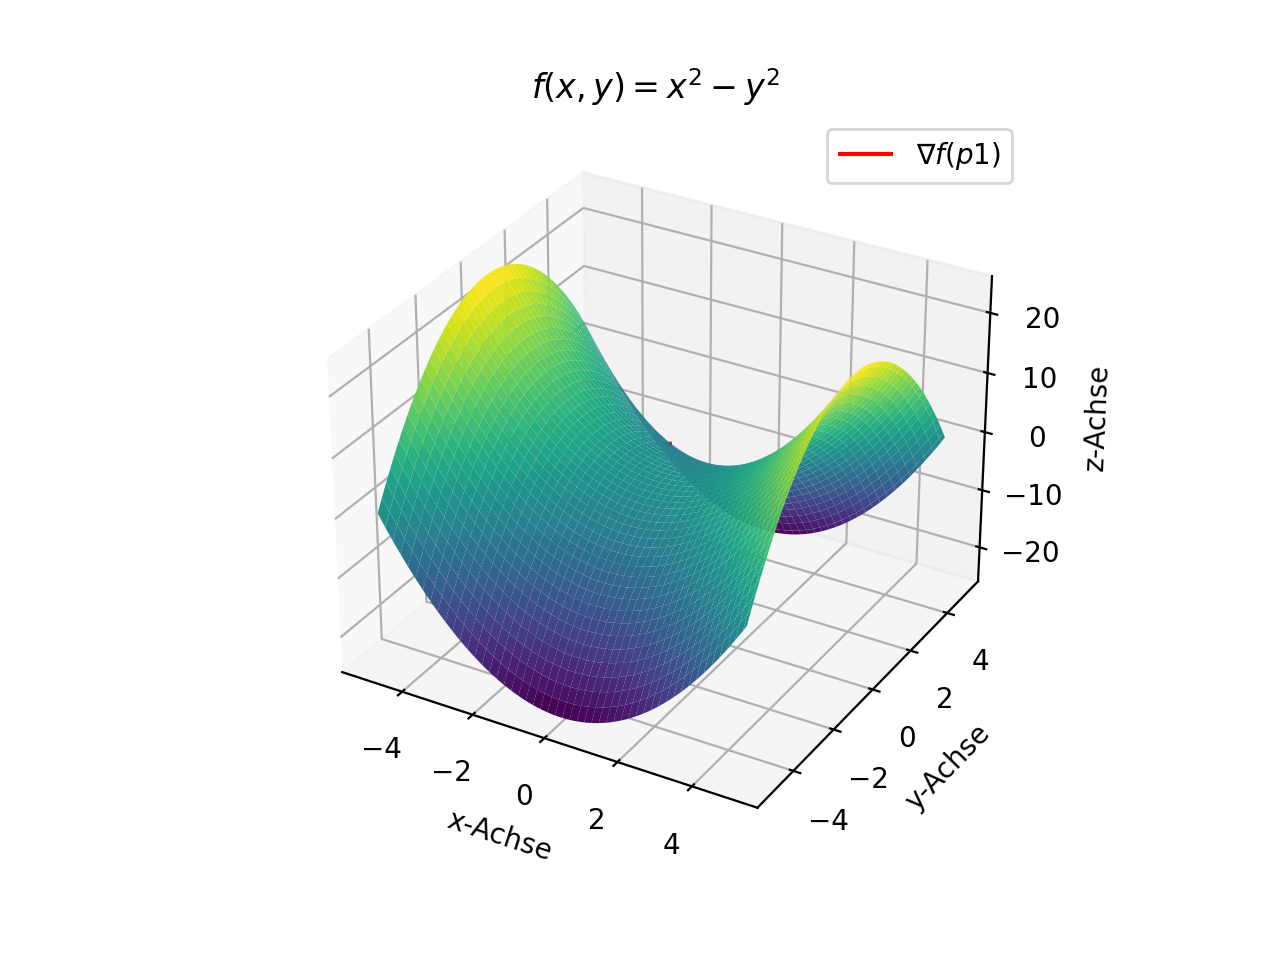

In [9]:
%matplotlib notebook

p1 = [0, 0, 5, 0.1, 0.1, 0.1]
vectors = [p1]
plt_function(name="multivariate5", space=(-5.0, 5.0), plot_3D_graph=True, vector_points=vectors)

Eine genauere Definition und weitere Beispiele, wie man mehrdimensionale Extremstellen mithilfe der Hesse-Matrix berechnet, befinden sich in diesem <a href="https://www.massmatics.de/merkzettel/#!207:Mehrdimensionale_Extremstellen">Artikel</a>.

Die Hesse-Matrix findet jedoch nicht nur Anwendung in der Entdeckung von **mehrdimensionalen Extremstellen**. In Kapitel 9 und 10 (TODO) werden wir noch weitere Anwendungsfälle kennen lernen, wenn wir **Taylorreihen** und den **Gradient Descent** behandeln.

## Gradienten, Jacobi-Matrix und Hesse-Matrix Quiz <a class="anchor" id="q1"/><br>

<div class="task">
    <b>Aufgabe</b>: Gradienten, Jacobi-Matrix und Hesse-Matrix Quiz 
    <br>
    <br> Lösen Sie das folgende Quiz "<b>Gradienten, Jacobi-Matrix und Hesse-Matrix Quiz </b>". Hier finden Sie die jeweiligen Antwortmöglichkeiten zu jeder Frage, geben Sie im Quiz dann den entsprechenden Buchstaben an. Es wird empfohlen, die Aufgaben auf einem Blatt/Tablet/o.ä. zu rechnen und dann erst die Lösungen mit den Antwortmöglichkeiten abzugleichen.
    
<u>Antwortmöglichkeiten zu Frage 1</u>:
<ol style="list-style-type:lower-alpha">
    <li>$\nabla f(x,y,z) = \begin{bmatrix} e^x \cos(y) + 2xy^2z^2 & -e^x \sin(y) + 2x^2yz^2 & 2x^2y^2z\end{bmatrix}$</li>
    <li>$\nabla f(x,y,z) = \begin{bmatrix} e^x \cos(y) + 2xy^2z^2 & -e^x \sin(y) + 2x^2yz^2 & x^2y^2z\end{bmatrix}$</li>
    <li>$\nabla f(x,y,z) = \begin{bmatrix} e^x \cos(y) + x^2y^2z^2 & -e^x \sin(y) + 2x^2yz^2 & 2x^2y^2z\end{bmatrix}$</li>
    <li>$\nabla f(x,y,z) = \begin{bmatrix} e^x \cos(y) + 2xy^2z^2 & e^x \sin(y) + 2x^2yz^2 & 2x^2y^2z\end{bmatrix}$</li>
</ol>
    
<u>Antwortmöglichkeiten zu Frage 2</u>:
<ol style="list-style-type:lower-alpha">
    <li>$\nabla f(0,0,0) = \begin{bmatrix} 1 & 3 & 4 \end{bmatrix}$</li>
    <li>$\nabla f(0,0,0) = \begin{bmatrix} 0 & 3 & 4 \end{bmatrix}$</li>
    <li>$\nabla f(0,0,0) = \begin{bmatrix} 1 & 0 & 1 \end{bmatrix}$</li>
    <li>$\nabla f(0,0,0) = \begin{bmatrix} 0 & 3 & 3 \end{bmatrix}$</li>
    <li>$\nabla f(0,0,0) = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}$</li>
</ol>
    
<u>Antwortmöglichkeiten zu Frage 3</u>:
<ol style="list-style-type:lower-alpha">
    <li>$J_f(x,y,z) = \begin{pmatrix}2x & -2y\\ -2y & 2x\end{pmatrix}$</li><br>
    <li>$J_f(x,y,z) = \begin{pmatrix}2x & 2y\\ -2y & 2x\end{pmatrix}$</li><br>
    <li>$J_f(x,y,z) = \begin{pmatrix}2x & 2y\\ 2y & 2x\end{pmatrix}$</li><br>
    <li>$J_f(x,y,z) = \begin{pmatrix}2x & -2y\\ 2y & 2x\end{pmatrix}$</li>
</ol>
    
<u>Antwortmöglichkeiten zu Frage 4</u>:
<ol style="list-style-type:lower-alpha">
    <li>$J_f(x,y,z) = \begin{pmatrix}0 & 0 & 1\\ 0 & 0 & 2 \\ 1 & 0 & 0\end{pmatrix}$</li><br>
    <li>$J_f(x,y,z) = \begin{pmatrix}0 & 0 & 1\\ 0 & 0 & 2 \\ 1 & 1 & 1\end{pmatrix}$</li><br>
    <li>$J_f(x,y,z) = \begin{pmatrix}0 & 0 & 0\\ 0 & 0 & 0 \\ 0 & 0 & 0\end{pmatrix}$</li><br>
    <li>$J_f(x,y,z) = \begin{pmatrix}0 & 0 & 1\\ 0 & 0 & 2 \\ 0 & 0 & 1\end{pmatrix}$</li><br>
    <li>$J_f(x,y,z) = \begin{pmatrix}0 & 0 & 1\\ 0 & 0 & 1 \\ 0 & 0 & 1\end{pmatrix}$</li><br>
</ol>

    
<u>Antwortmöglichkeiten zu Frage 5</u>:
<ol style="list-style-type:lower-alpha">
    <li>$H_f(x,y) = \begin{pmatrix}6xy & 3x^2\\ 3x^2 & 0\end{pmatrix}$</li><br>
    <li>$H_f(x,y) = \begin{pmatrix}3xy & 3x^2\\ 3x^2 & 0\end{pmatrix}$</li><br>
    <li>$H_f(x,y) = \begin{pmatrix}0 & 3x^2\\ 3x^2 & 6xy\end{pmatrix}$</li><br>
    <li>$H_f(x,y) = \begin{pmatrix}0 & 3x^2\\ 3x^2 & 3xy\end{pmatrix}$</li><br>
</ol>
    
</div>

In [24]:
start_quiz(71, "calculus")

---
---
